## EDA on Global Terrorism Data

By Chinmay Khisti

## Data preparation

### Loading Data

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# loading data
file_path = 'globalterrorismdb_0718dist.csv'
df_glbTrr = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)
df_glbTrr.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

### Familiarizing with the Data

In [4]:
#shape of the data frame
df_glbTrr.shape

(181691, 135)

In [5]:
#List of features
print(list(df_glbTrr.columns))

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

filtering null values and droping features with large null values

In [6]:
#checking null and filtering usable features
all_per_na = 0.7 # amount of null vall allowed 

def checkNull_per(col):
    return col_na_per[col] < all_per_na
col_na_per = dict(df_glbTrr.isna().mean().sort_values(ascending=False))
filtered_features = list(filter(checkNull_per,col_na_per))
len(filtered_features)

64

In [7]:
# Dataframe to be worked on
df_glbTrr_working = df_glbTrr[filtered_features]
df_glbTrr_working.head()

,location,propcomment,propextent,propextent_txt,scite2,ransom,nperps,nperpcap,nwoundte,weapdetail,nkillter,scite1,summary,claimed,nwoundus,nkillus,corp1,weapsubtype1,weapsubtype1_txt,nwound,targsubtype1,targsubtype1_txt,nkill,longitude,latitude,natlty1,natlty1_txt,target1,city,provstate,guncertain1,ishostkid,specificity,doubtterr,multiple,crit1,iyear,iday,imonth,targtype1_txt,gname,individual,dbsource,country,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,extended,region_txt,country_txt,region,crit2,targtype1,weaptype1,weaptype1_txt,attacktype1_txt,attacktype1,vicinity,suicide,success,crit3,property,eventid
0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,68.0,Named Civilian,1.0,-69.951164,18.456792,58.0,Dominican Republic,Julio Guzman,Santo Domingo,NaN,0.0,0.0,1.0,0.0,0.0,1,1970,2,7,Private Citizens & Property,MANO-D,0,PGIS,58,0,0,0,0,0,Central America & Caribbean,Dominican Republic,2,1,14,13,Unknown,Assassination,1,0,0,1,1,0,197000000001
1,NaN,NaN,NaN,NaN,NaN,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belgian Ambassador Daughter,NaN,NaN,0.0,45.0,"Diplomatic Personnel (outside of embassy, cons...",0.0,-99.086624,19.371887,21.0,Belgium,"Nadine Chaval, daughter",Mexico city,Federal,0.0,1.0,1.0,0.0,0.0,1,1970,0,0,Government (Diplomatic),23rd of September Communist League,0,PGIS,130,0,1,1,1,0,North America,Mexico,1,1,7,13,Unknown,Hostage Taking (Kidnapping),6,0,0,1,1,0,197000000002
2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Voice of America,NaN,NaN,0.0,54.0,Radio Journalist/Staff/Facility,1.0,120.599741,15.478598,217.0,United States,Employee,Unknown,Tarlac,0.0,0.0,4.0,0.0,0.0,1,1970,0,1,Journalists & Media,Unknown,0,PGIS,160,-9,-9,1,1,0,Southeast Asia,Philippines,5,1,10,13,Unknown,Assassination,1,0,0,1,1,0,197001000001
3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,Unknown Explosive Type,NaN,46.0,Embassy/Consulate,NaN,23.762728,37.997490,217.0,United States,U.S. Embassy,Athens,Attica,0.0,0.0,1.0,0.0,0.0,1,1970,0,1,Government (Diplomatic),Unknown,0,PGIS,78,-9,-9,1,1,0,Western Europe,Greece,8,1,7,6,Explosives,Bombing/Explosion,3,0,0,1,1,1,197001000002
4,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,Embassy/Consulate,NaN,130.396361,33.580412,217.0,United States,U.S. Consulate,Fukouka,Fukouka,0.0,0.0,1.0,-9.0,0.0,1,1970,0,1,Government (Diplomatic),Unknown,0,PGIS,101,-9,-9,1,1,0,East Asia,Japan,4,1,7,8,Incendiary,Facility/Infrastructure Attack,7,0,0,1,1,1,197001000003


In [8]:
#getting information about features
df_glbTrr_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 64 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   location          55495 non-null   object 
 1   propcomment       57959 non-null   object 
 2   propextent        64065 non-null   float64
 3   propextent_txt    64065 non-null   object 
 4   scite2            76933 non-null   object 
 5   ransom            77381 non-null   float64
 6   nperps            110576 non-null  float64
 7   nperpcap          112202 non-null  float64
 8   nwoundte          112548 non-null  float64
 9   weapdetail        114021 non-null  object 
 10  nkillter          114733 non-null  float64
 11  scite1            115500 non-null  object 
 12  summary           115562 non-null  object 
 13  claimed           115571 non-null  float64
 14  nwoundus          116989 non-null  float64
 15  nkillus           117245 non-null  float64
 16  corp1             13

displaying important features used in analysis

In [9]:
df_glbTrr_working[['eventid', 'city', 'region_txt', 'country_txt', 'iyear', 'imonth', 'gname', 'attacktype1_txt', 'nkill', 'nwound', 'latitude', 'longitude']].head()

,eventid,city,region_txt,country_txt,iyear,imonth,gname,attacktype1_txt,nkill,nwound,latitude,longitude
0,197000000001,Santo Domingo,Central America & Caribbean,Dominican Republic,1970,7,MANO-D,Assassination,1.0,0.0,18.456792,-69.951164
1,197000000002,Mexico city,North America,Mexico,1970,0,23rd of September Communist League,Hostage Taking (Kidnapping),0.0,0.0,19.371887,-99.086624
2,197001000001,Unknown,Southeast Asia,Philippines,1970,1,Unknown,Assassination,1.0,0.0,15.478598,120.599741
3,197001000002,Athens,Western Europe,Greece,1970,1,Unknown,Bombing/Explosion,NaN,NaN,37.997490,23.762728
4,197001000003,Fukouka,East Asia,Japan,1970,1,Unknown,Facility/Infrastructure Attack,NaN,NaN,33.580412,130.396361


replacing 'Unknown' values with null/None for simplyfing the process for city and group name

In [10]:
df_glbTrr_working['gname'].replace(['Unknown'],None,inplace=True)
df_glbTrr_working['city'].replace(['Unknown'],None,inplace=True)

C:\Users\a\AppData\Local\Temp\ipykernel_11736\2965430431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glbTrr_working['gname'].replace(['Unknown'],None,inplace=True)
C:\Users\a\AppData\Local\Temp\ipykernel_11736\2965430431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glbTrr_working['city'].replace(['Unknown'],None,inplace=True)


In [11]:
#df_glbTrr_working['city'] = np.where(df_glbTrr_working['city']=='Unknown',None,df_glbTrr_working['city'])

In [12]:
#checking weather the 'unknown' were replaced
df_glbTrr_working[df_glbTrr_working['gname']=='Unknown']['gname'].count()

0

Finding Outlier

Outlier found : 1


,location,propcomment,propextent,propextent_txt,scite2,ransom,nperps,nperpcap,nwoundte,weapdetail,nkillter,scite1,summary,claimed,nwoundus,nkillus,corp1,weapsubtype1,weapsubtype1_txt,nwound,targsubtype1,targsubtype1_txt,nkill,longitude,latitude,natlty1,natlty1_txt,target1,city,provstate,guncertain1,ishostkid,specificity,doubtterr,multiple,crit1,iyear,iday,imonth,targtype1_txt,gname,individual,dbsource,country,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,extended,region_txt,country_txt,region,crit2,targtype1,weaptype1,weaptype1_txt,attacktype1_txt,attacktype1,vicinity,suicide,success,crit3,property,eventid
17658,NaN,NaN,4.0,Unknown,NaN,0.0,NaN,NaN,NaN,Automatic firearm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Automatic or Semi-Automatic Rifle,0.0,98.0,Other Facility,5.0,-86185896.0,12.643985,145.0,Nicaragua,tour of El Oregano,Valle El Oregano,Matagalpa,0.0,0.0,1.0,-9.0,0.0,1,1982,24,12,Tourists,Contras,0,PGIS,145,-9,-9,0,-9,0,Central America & Caribbean,Nicaragua,2,1,18,5,Firearms,Armed Assault,2,0,0,1,1,1,198212240004


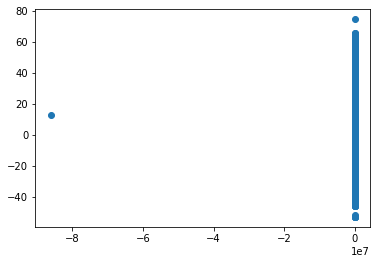

In [13]:
plt.scatter(x=df_glbTrr_working['longitude'], y=df_glbTrr_working['latitude'])
print('Outlier found :',len(np.where(df_glbTrr_working['longitude']<-4)))
outlier_id = (df_glbTrr_working[df_glbTrr_working['longitude']<-180]['eventid'])
df_glbTrr_working[df_glbTrr_working['longitude']<-180]

In [14]:
#rectifying data
df_glbTrr_working['longitude'] = np.where(df_glbTrr_working['longitude']<-180, -86.1858960, df_glbTrr_working['longitude'])

C:\Users\a\AppData\Local\Temp\ipykernel_11736\730417458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glbTrr_working['longitude'] = np.where(df_glbTrr_working['longitude']<-180, -86.1858960, df_glbTrr_working['longitude'])


## Top Statistics

In [15]:
#Top Statistics
top_freq = dict(df_glbTrr_working.describe(include='O')[['country_txt', 'city', 'region_txt', 'gname','attacktype1_txt']].T['top'])
top_freq['iyear'] = int(df_glbTrr_working[['eventid', 'iyear']].groupby(['iyear']).agg(['count'])['eventid'].sort_values(by='count',ascending=False).head(1).index.values)
top_freq['imonth'] = int(df_glbTrr_working[['eventid', 'imonth']].groupby(['imonth']).agg(['count'])['eventid'].sort_values(by='count',ascending=False).head(1).index.values)

In [16]:
print('Countries with most attacks :',top_freq['country_txt'])
print('City with most attacks      :',top_freq['city'])
print('Reagion with most attacks   :',top_freq['region_txt'])
print('Year with most attacks      :',top_freq['iyear'])
print('Month with most attacks     :',top_freq['imonth'])
print('Group with most attacks     :',top_freq['gname'])
print('Most attack Type            :',top_freq['attacktype1_txt'])

Countries with most attacks : Iraq
City with most attacks      : Baghdad
Reagion with most attacks   : Middle East & North Africa
Year with most attacks      : 2014
Month with most attacks     : 5
Group with most attacks     : Taliban
Most attack Type            : Bombing/Explosion


color pallet used

In [17]:
# Graph Formatting
clr = ['#E32D91', '#C830CC', '#4EA6DC', '#4775E7', '#8971E1', '#D54773', '#454551', '#FFBE0B', '#FB5607', '#FF006E', '#8338EC', '#3A86FF']

## Visualizing the Data

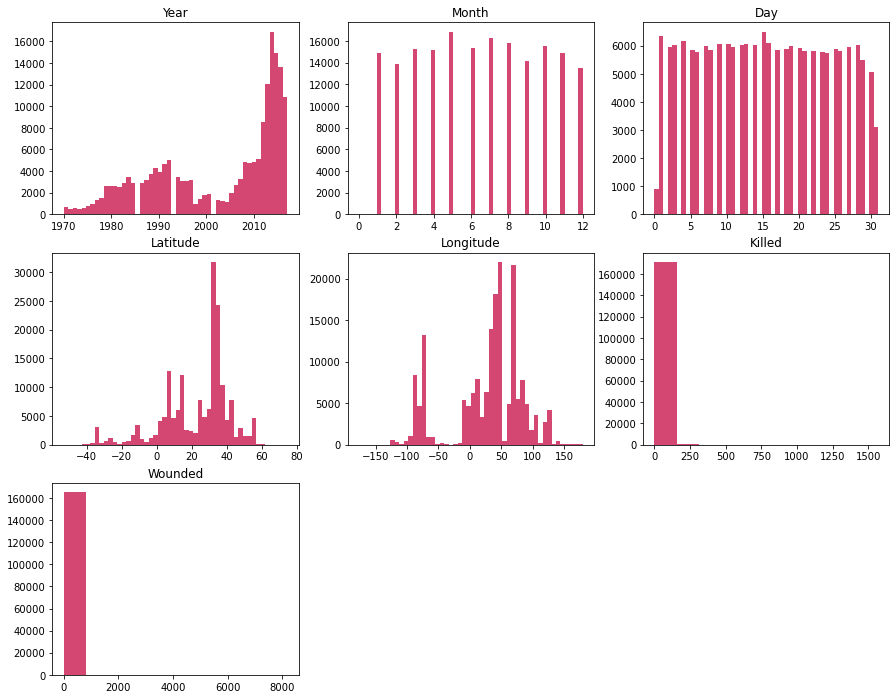

In [18]:
#histogram for various data visualization
cl_subplt = 5
plt.figure(figsize=(15,12))
plt.subplot(3, 3, 1)
_ = plt.hist(df_glbTrr_working['iyear'], bins=50, color=clr[cl_subplt])
_ = plt.title('Year')

plt.subplot(3, 3, 2)
_ = plt.hist(df_glbTrr_working['imonth'], bins=50, color=clr[cl_subplt])
_ = plt.title('Month')

plt.subplot(3, 3, 3)
_ = plt.hist(df_glbTrr_working['iday'], bins=50, color=clr[cl_subplt])
_ = plt.title('Day')

plt.subplot(3, 3, 4)
_ = plt.hist(df_glbTrr_working['latitude'], bins=50, color=clr[cl_subplt])
_ = plt.title('Latitude')

plt.subplot(3, 3, 5)
_ = plt.hist(df_glbTrr_working['longitude'], bins=50, color=clr[cl_subplt])
_ = plt.title('Longitude')

plt.subplot(3, 3, 6)
_ = plt.hist(df_glbTrr_working['nkill'], bins=10, color=clr[cl_subplt])
_ = plt.title('Killed')

plt.subplot(3, 3, 7)
_ = plt.hist(df_glbTrr_working['nwound'], bins=10, color=clr[cl_subplt])
_ = plt.title('Wounded')
plt.show()

Correlation among dataset

In [19]:
#correlation among dataset
df_glbTrr_working[['iyear', 'imonth', 'iday', 'latitude', 'longitude', 'nkill', 'nwound']].corr(method='pearson')

,iyear,imonth,iday,latitude,longitude,nkill,nwound
iyear,1.000000,0.000139,0.018254,0.166933,0.550680,0.015341,0.015273
imonth,0.000139,1.000000,0.005497,-0.015978,-0.004012,0.003463,0.002938
iday,0.018254,0.005497,1.000000,0.003423,0.012068,-0.003693,-0.001268
latitude,0.166933,-0.015978,0.003423,1.000000,0.263648,-0.018124,0.015988
longitude,0.550680,-0.004012,0.012068,0.263648,1.000000,-0.000150,0.016756
nkill,0.015341,0.003463,-0.003693,-0.018124,-0.000150,1.000000,0.534375
nwound,0.015273,0.002938,-0.001268,0.015988,0.016756,0.534375,1.000000


#### Number of attacks every year

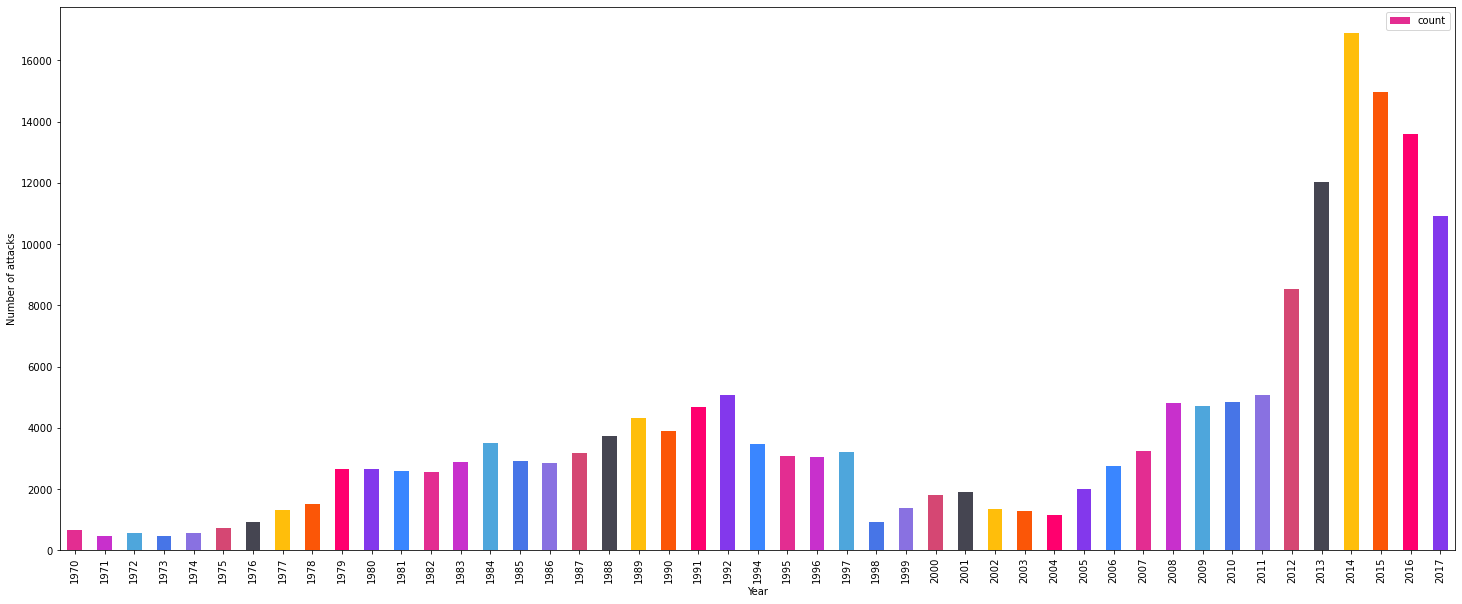

In [20]:
#Number of attacks every year
df_attacks_year = df_glbTrr_working[['eventid', 'iyear']].groupby(['iyear']).agg(['count'])['eventid'].sort_values(by='iyear',ascending=True).reset_index()
df_attacks_year.plot(kind = 'bar',x = 'iyear', y = 'count', figsize = (25,10), color=clr)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.show()

#### Terrorist activities each year by region

In [21]:
act_region = df_glbTrr_working[['region_txt','iyear','eventid']].groupby(['region_txt','iyear']).agg({'eventid':['count']},as_index=False).reset_index()

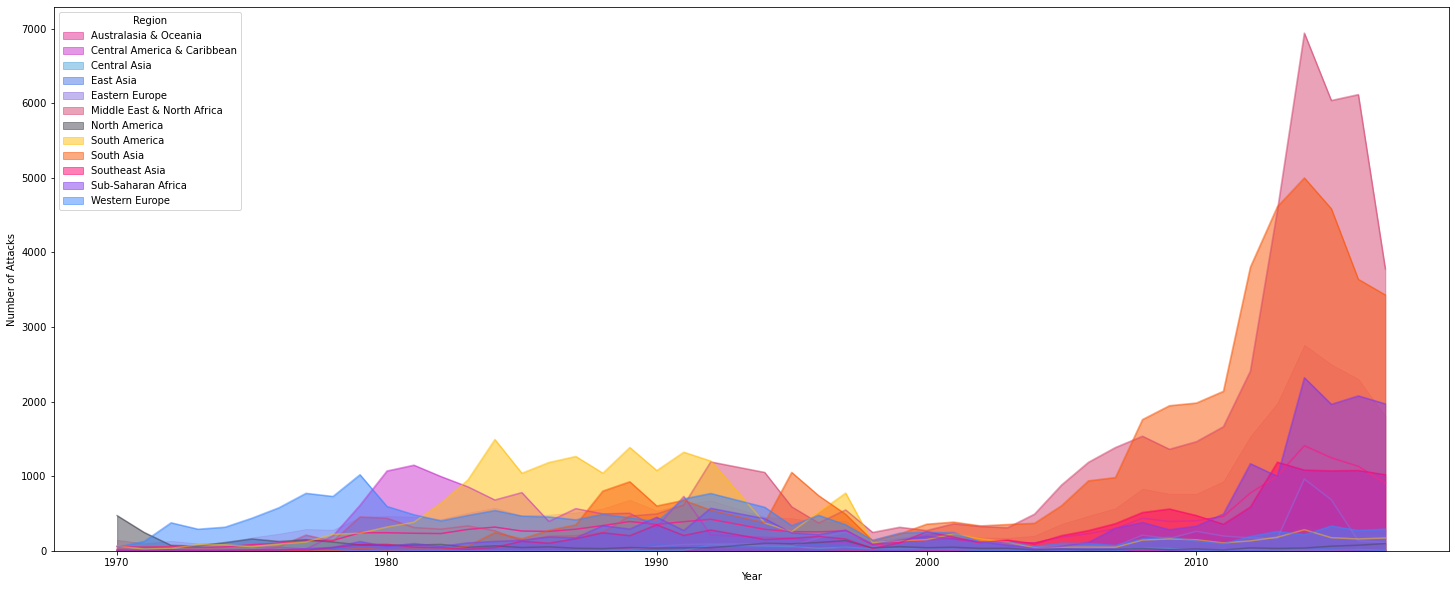

In [22]:
sns.set_palette(sns.color_palette(clr))
_, ax = plt.subplots()
df_wide = act_region.pivot(index='iyear', columns='region_txt', values=('eventid','count'))
sns.lineplot(x='iyear', y=('eventid','count'), data=act_region, ax=ax, legend=False)
ax.set_prop_cycle(None)
df_wide.plot.area(stacked=False, alpha=0.5, ax=ax, figsize=(25,10))
ax.set_xlabel('Year')
ax.set_ylabel('Number of Attacks')
plt.legend(title='Region')
plt.show()

## Analysing Data

### Top 50 worst attacks

In [23]:
wt_kill = 0.75
wt_wounded = 0.25
def wt_avg(x):
    return x[0]*wt_kill+x[1]*wt_wounded
df_glbTrr_working['avg_ppl_affected'] = df_glbTrr_working[['nkill', 'nwound']].apply(lambda x: wt_avg(x), axis=1)
df_glbTrr_working[[ 'city', 'region_txt', 'country_txt', 'iyear', 'imonth', 'iday', 'gname', 'attacktype1_txt', 'avg_ppl_affected',
                    'latitude', 'longitude']].sort_values(by=['avg_ppl_affected'], ascending= False).head(50)


C:\Users\a\AppData\Local\Temp\ipykernel_11736\1566672016.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glbTrr_working['avg_ppl_affected'] = df_glbTrr_working[['nkill', 'nwound']].apply(lambda x: wt_avg(x), axis=1)


,city,region_txt,country_txt,iyear,imonth,iday,gname,attacktype1_txt,avg_ppl_affected,latitude,longitude
73126,New York City,North America,United States,2001,9,11,Al-Qaida,Hijacking,3085.50,40.697132,-73.931351
73127,New York City,North America,United States,2001,9,11,Al-Qaida,Hijacking,3085.00,40.697132,-73.931351
58841,Tokyo,East Asia,Japan,1995,3,20,Aum Shinri Kyo,Unarmed Assault,1384.75,35.689125,139.747742
68071,Nairobi,Sub-Saharan Africa,Kenya,1998,8,7,Al-Qaida,Bombing/Explosion,1168.00,-1.285180,36.821107
55934,Gikoro,Sub-Saharan Africa,Rwanda,1994,4,13,Hutu extremists,Armed Assault,885.00,-1.932787,30.332456
179671,Mogadishu,Sub-Saharan Africa,Somalia,2017,10,14,Al-Shabaab,Bombing/Explosion,520.00,2.059819,45.326115
133225,Badush,Middle East & North Africa,Iraq,2014,6,10,Islamic State of Iraq and the Levant (ISIL),Armed Assault,502.50,36.407394,42.964626
76347,Dhading district,South Asia,Nepal,2004,3,21,Communist Party of Nepal- Maoist (CPN-M),Armed Assault,442.50,27.959441,84.895897
76953,Beslan,Eastern Europe,Russia,2004,9,1,Riyadus-Salikhin Reconnaissance and Sabotage B...,Hostage Taking (Barricade Incident),439.75,43.191626,44.541763
61548,Colombo,South Asia,Sri Lanka,1996,1,31,Liberation Tigers of Tamil Eelam (LTTE),Bombing/Explosion,385.50,6.941837,79.861687


### Pivot table shocasing average number of persons killed by year in every country

In [24]:
pd.pivot_table(df_glbTrr_working[['country_txt', 'iyear', 'nkill']], index='country_txt', values='nkill', columns='iyear', aggfunc='mean', dropna=True).head()

iyear,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country_txt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,17.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,11.636364,1.000000,6.000000,2.266667,1.361111,2.444444,0.833333,7.750000,4.000000,8.000000,4.87500,2.923077,13.384615,1.947368,1.663265,3.197674,2.367742,2.623656,3.547337,2.676471,2.121514,2.134686,3.674699,2.433310,2.617502,3.058757,3.376426,3.977979,4.570143
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.333333,0.500000,NaN,1.166667,0.634146,0.000000,2.00000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.500000,0.000000,0.000000,0.000000
Algeria,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000,1.400000,1.102804,2.202643,2.259459,4.198413,12.401163,6.520548,4.40566,3.882353,5.522124,4.694656,3.586667,2.477612,2.235294,1.258503,1.943548,2.327103,1.888889,1.090000,1.785714,0.731707,4.809524,3.083333,1.312500,1.000000,0.857143
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,9.500000,NaN,3.0,1.000000,47.000000,22.37500,1.200000,23.800000,1.666667,12.083333,7.333333,0.717073,4.312500,1.940000,12.000000,5.200000,4.500000,4.857143,15.277778,9.34375,8.900000,21.692308,9.833333,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.750000
Argentina,0.294118,0.833333,0.384615,0.32,0.355932,4.730769,2.652174,0.538462,0.65,0.785714,0.0,0.0,0.111111,0.055556,0.02439,0.051282,0.071429,0.037975,0.030303,0.812500,0.032258,0.037037,0.804878,6.142857,0.000000,0.052632,0.272727,NaN,0.00000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Visualising data on a Map

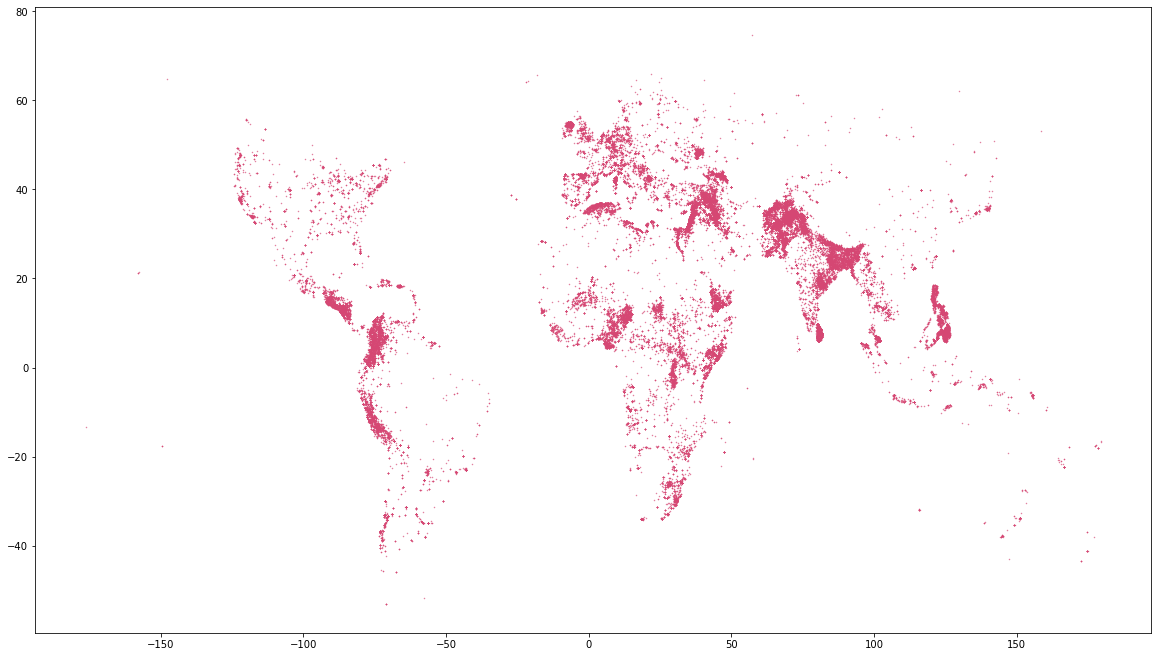

In [25]:
fig = plt.figure(figsize=(20,11.52))
fig.patch.set_alpha(0.0)
ax = fig.add_subplot()
ax.patch.set_alpha(0)
plt.scatter(x=df_glbTrr_working['longitude'], y=df_glbTrr_working['latitude'], alpha=0.8, s= 0.2, color =clr[5])
plt.show()

### Top Countries affected by terrorist attack

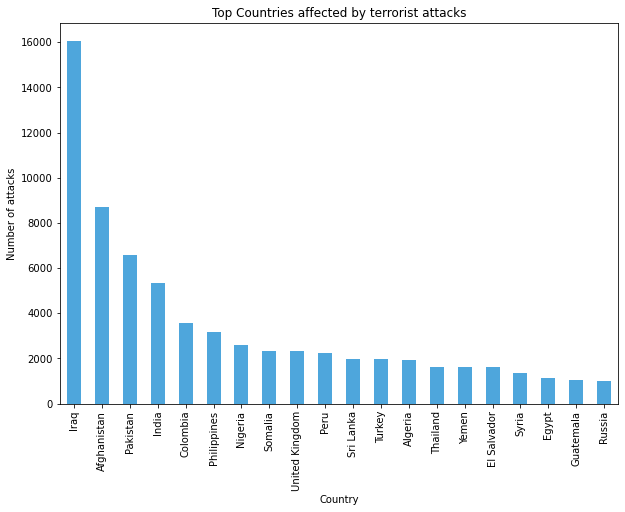

In [26]:
df_glbTrr_working[['country_txt', 'nkill']][(~df_glbTrr_working['nkill'].isna()) & 
                    df_glbTrr_working['nkill'] != 0.0].groupby('country_txt').agg({'nkill': ['count']})\
                        .sort_values(by=('nkill', 'count'),ascending=False).head(20).plot(kind='bar', legend=None, figsize=(10,7), color=clr[2])
plt.xlabel('Country')
plt.ylabel('Number of attacks')
plt.title('Top Countries affected by terrorist attacks')
plt.show()

### Terrorist attack for a perticular year and there location

In [27]:
year = 2001
df_glbTrr_working[['iyear', 'imonth', 'iday', 'country_txt', 'region', 'city', 'gname']][df_glbTrr_working['iyear'] == year].sort_values(['imonth', 'iday'])

,iyear,imonth,iday,country_txt,region,city,gname
71650,2001,1,0,Colombia,3,None,Paramilitaries
71693,2001,1,0,Colombia,3,Barrancabermeja,Right-Wing Paramilitaries
71728,2001,1,0,Algeria,10,Khemis Miliana,Muslim Rebels
71651,2001,1,1,Yemen,10,Aden,None
71652,2001,1,1,Colombia,3,Bogota district,United Self Defense Units of Colombia (AUC)
...,...,...,...,...,...,...,...
73551,2001,12,28,Angola,11,N'dalatando,National Union for the Total Independence of A...
73552,2001,12,28,Uganda,11,Mbale,None
73553,2001,12,30,India,6,Kanthol,None
73554,2001,12,30,Russia,9,Grozny,Armed Forces of the Chechen Republic of Ichkeria


#### Total no. of people killed in terror attack

In [28]:
print('Total number of people killed in terrorist attack: ', int(df_glbTrr_working['nkill'].sum()))

Total number of people killed in terrorist attack:  411868


### Attack type distribution with kills

In [29]:
df_glbTrr_working[['attacktype1_txt','nkill']].groupby('attacktype1_txt').sum().T

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


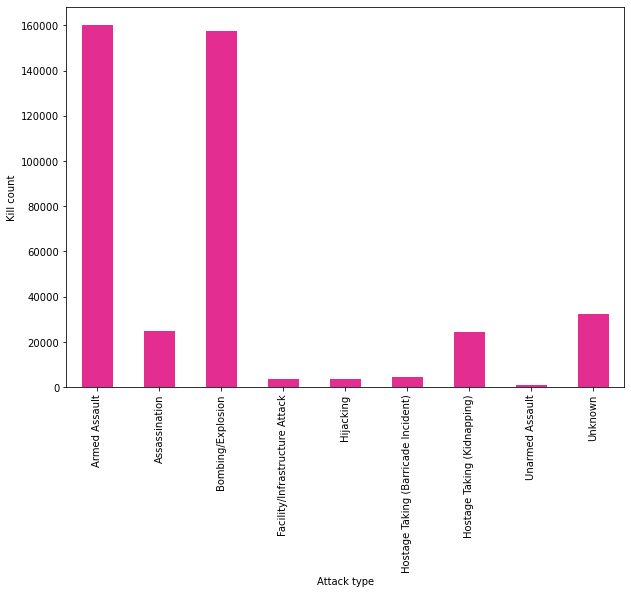

In [30]:
df_glbTrr_working[['attacktype1_txt','nkill']].groupby('attacktype1_txt').agg(['sum'])[[ 'nkill']].plot(kind='bar', figsize=(10,7), legend=None)
plt.xlabel('Attack type')
plt.ylabel('Kill count')
plt.show()

### Total number of persons killed country wise

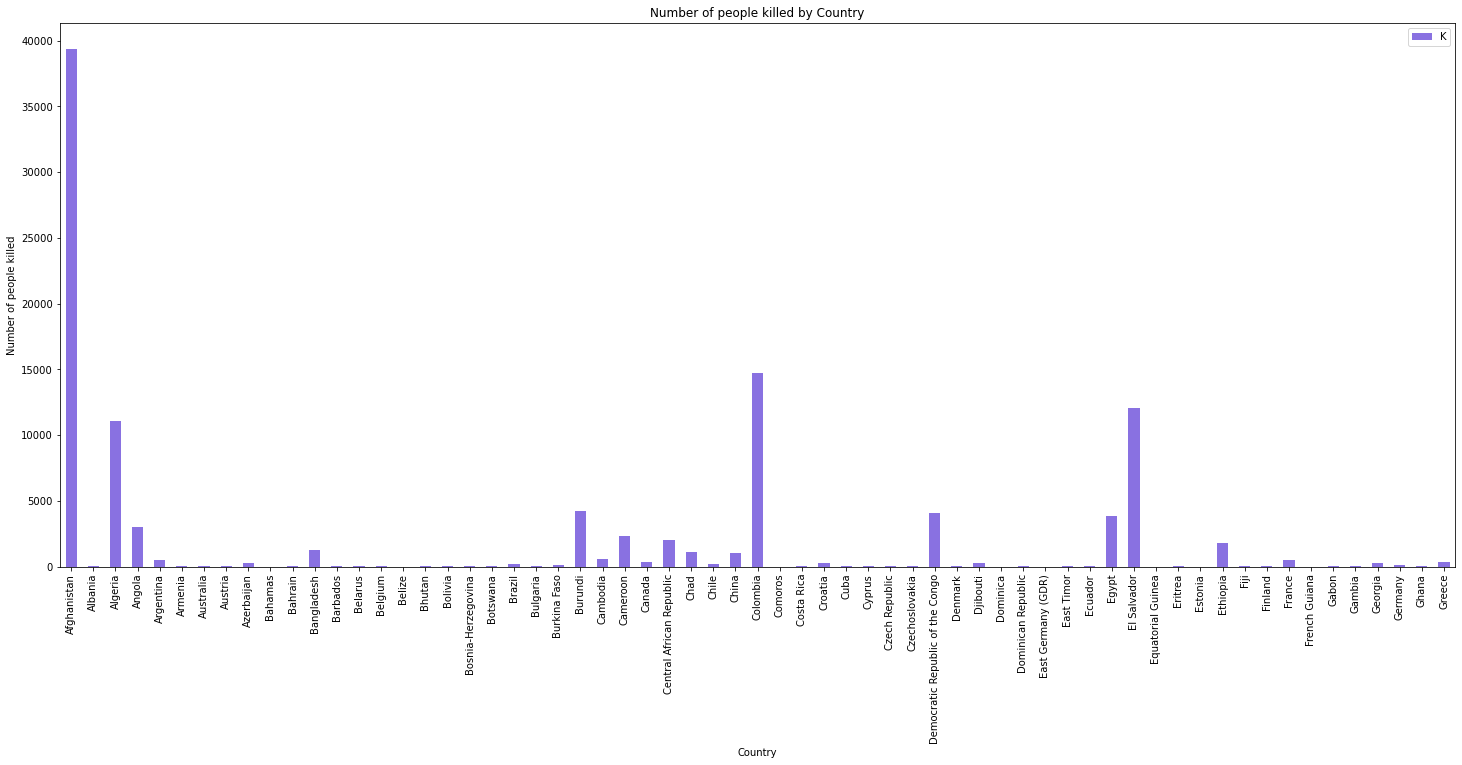

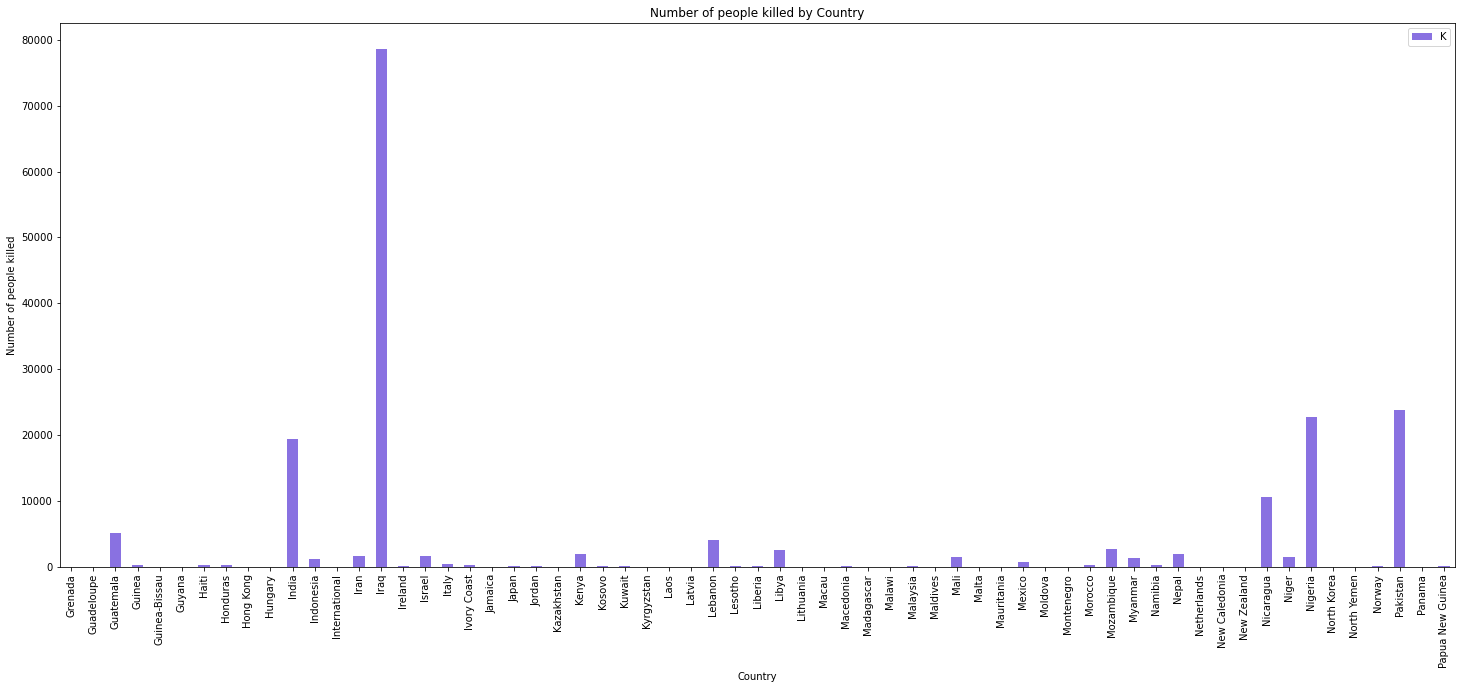

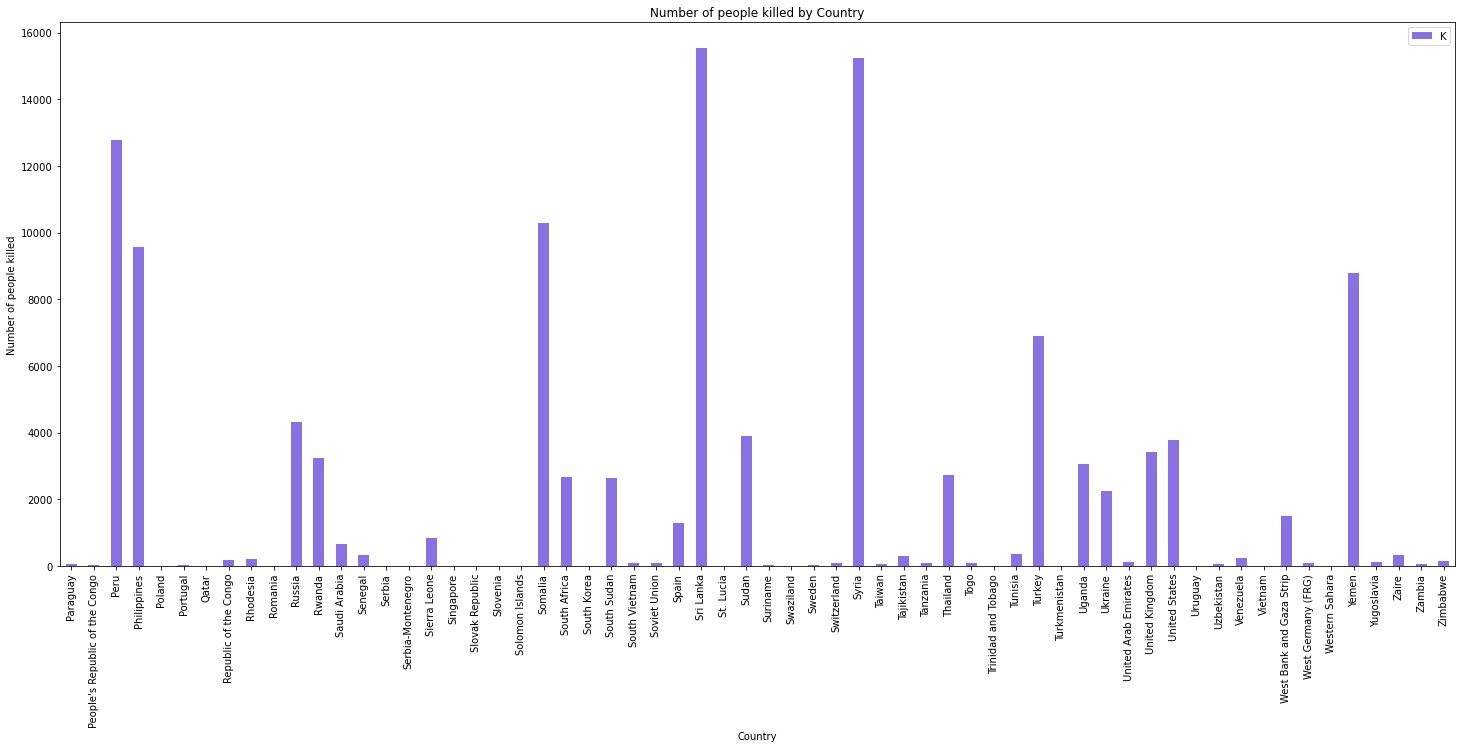

In [31]:
#Country vs killed count
df_country_kill = df_glbTrr_working[['country_txt', 'nkill']][(~df_glbTrr_working['nkill'].isna()) & 
                                        df_glbTrr_working['nkill'] != 0.0].groupby('country_txt').agg({'nkill': ['sum']})\
                                        .sort_values(by=('country_txt'),ascending=True)
                                        
df_country_kill.iloc[:63,:].plot(kind= 'bar', figsize=(25,10), color=clr[4])
plt.xlabel('Country')
plt.legend('Killed')
plt.ylabel('Number of people killed')
plt.title('Number of people killed by Country')
df_country_kill.iloc[63:126,:].plot(kind= 'bar', figsize=(25,10), color=clr[4])
plt.xlabel('Country')
plt.legend('Killed')
plt.ylabel('Number of people killed')
plt.title('Number of people killed by Country')
df_country_kill.iloc[126:,:].plot(kind= 'bar', figsize=(25,10), color=clr[4])
plt.xlabel('Country')
plt.legend('Killed')
plt.ylabel('Number of people killed')
plt.title('Number of people killed by Country')
plt.show()

### Attack share of top twenty groups

<AxesSubplot:ylabel='eventid'>

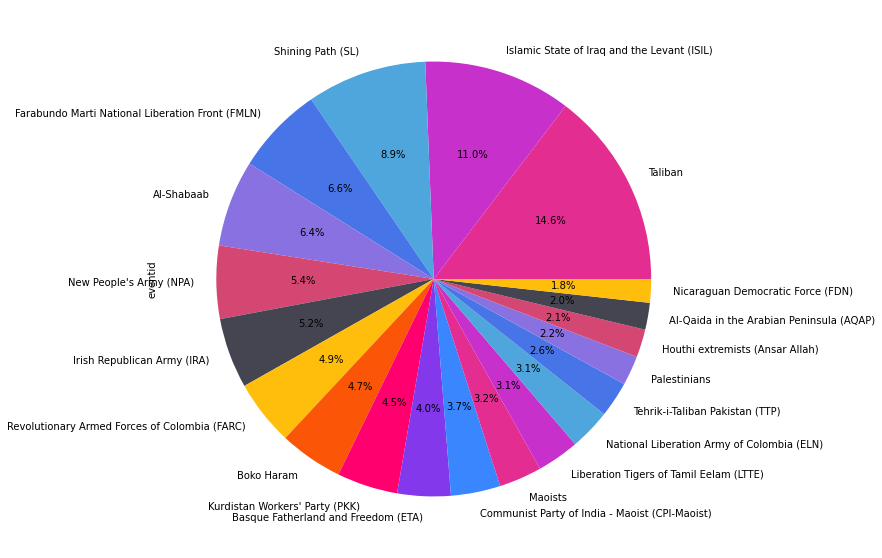

In [32]:
df_glbTrr_working[['gname','eventid']].groupby(['gname']).count().sort_values(by =('eventid'),ascending=False).head(20)\
        .plot(kind='pie', y= 'eventid',figsize= (10,10), autopct='%1.1f%%',legend=None)

Attack Type distribution

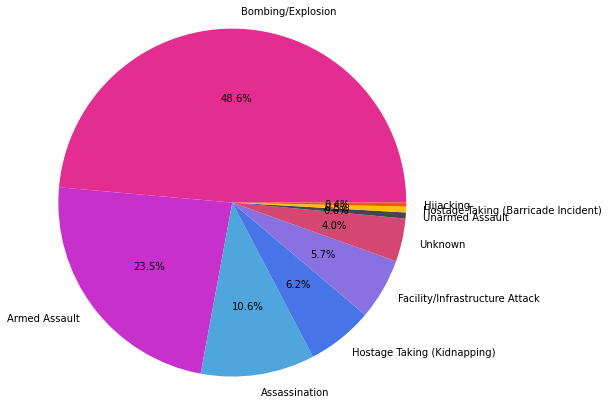

In [33]:
#Attack type distribution
df_attacktype_distribution= df_glbTrr_working[['attacktype1_txt','eventid']].groupby('attacktype1_txt').agg(['sum']).sort_values(by=('eventid','sum'),ascending=False).reset_index()
_ = plt.pie(df_attacktype_distribution['eventid']['sum'], labels=df_attacktype_distribution['attacktype1_txt'] , autopct='%1.1f%%', radius=2, colors=clr)
#plt.ylabel('Attack Type')
plt.show()

In [34]:
#top group responsible for each country and casulties
df_glbTrr_working[['gname','country_txt', 'nkill']].groupby(['gname','country_txt']).agg(['sum'],name='Killed').sort_values(by=('nkill', 'sum'), ascending=False).head(20)

,,nkill
,,sum
gname,country_txt,
Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
Taliban,Afghanistan,29269.0
Boko Haram,Nigeria,16917.0
Shining Path (SL),Peru,11595.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
Al-Shabaab,Somalia,8176.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
